In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
from pandas import Series

In [3]:
train_data = pd.read_csv(r"C:/01 Projects/07 Personal_Projects/06 Hackathon/01_WNS_Analytics_Wizard/train_NA17Sgz/train.csv")
train_data.shape

(237609, 7)

In [4]:
item_data = pd.read_csv(r"C:\01 Projects\07 Personal_Projects\06 Hackathon\01_WNS_Analytics_Wizard\train_NA17Sgz\item_data.csv")

In [5]:
view_log_data = pd.read_csv(r"C:\01 Projects\07 Personal_Projects\06 Hackathon\01_WNS_Analytics_Wizard\train_NA17Sgz\view_log.csv")

In [6]:
item_data.shape

(132761, 6)

In [7]:
view_log_data.shape

(3118622, 5)

In [8]:
train_data.columns, item_data.columns, view_log_data.columns

(Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
        'is_4G', 'is_click'],
       dtype='object'),
 Index(['item_id', 'item_price', 'category_1', 'category_2', 'category_3',
        'product_type'],
       dtype='object'),
 Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id'], dtype='object'))

In [9]:
len(train_data["user_id"].unique()), len(view_log_data["user_id"].unique())

(74723, 89157)

In [10]:
train_data["os_version"].unique(), view_log_data["device_type"].unique()

(array(['old', 'latest', 'intermediate'], dtype=object),
 array(['android', 'iphone', 'web'], dtype=object))

In [11]:
train_data.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [12]:
train_data[train_data['user_id']==71748].sort_values("impression_time", axis = 0, ascending = True)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
14,73278a4a86960eeb576a8fd4c9ec6997,2018-11-15 00:08:00,71748,259,intermediate,1,0
18776,0d977aeaaa2606697e263965053f6b3f,2018-11-19 20:01:00,71748,259,intermediate,1,0
49478,f3498e568e0bb45515779d6bd47e20f4,2018-11-19 20:07:00,71748,259,intermediate,1,0
82245,60e43a4b630d0225162fd9d70f8e6fed,2018-11-23 14:10:00,71748,259,intermediate,1,0
99014,a656ff539a8a86ebb396e37242753fe9,2018-11-29 12:44:00,71748,259,intermediate,0,0
95017,8a3839705a0955fad739177a19f3c8bb,2018-11-29 12:50:00,71748,259,intermediate,0,0
233696,86e34badcf80768f0ad5667554c8cec9,2018-12-12 09:01:00,71748,259,latest,1,0
235336,17ceee375eb5fb04817d6c9d673f40ff,2018-12-12 09:08:00,71748,259,latest,1,0


In [13]:
view_log_data[view_log_data['user_id']==71748].sort_values("server_time", axis = 0, ascending = True)

,server_time,device_type,session_id,user_id,item_id
399881,2018-10-23 12:59:00,android,658178,71748,122348
2076842,2018-11-23 12:00:00,android,415583,71748,32721


In [14]:
item_data.shape, item_data.columns

((132761, 6),
 Index(['item_id', 'item_price', 'category_1', 'category_2', 'category_3',
        'product_type'],
       dtype='object'))

In [15]:
item_data.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [16]:
item_data[item_data["category_3"] == 20].sort_values("product_type",axis=0)

,item_id,item_price,category_1,category_2,category_3,product_type
95436,55882,6278,11,35,20,62
40604,62413,1766,11,35,20,226
75631,68219,1305,11,35,20,226
104700,28692,2937,11,35,20,226
18087,7969,6278,11,35,20,349
59810,126439,2560,11,35,20,349
71750,93315,5184,11,35,20,349
31906,38426,2688,11,35,20,349
106630,90692,2432,11,35,20,349
5987,10207,14592,11,35,20,349


In [17]:
item_data[item_data["item_id"] == 32721]

,item_id,item_price,category_1,category_2,category_3,product_type
101541,32721,2224,8,21,139,2325


In [18]:
item_data[item_data["category_3"] == 139][item_data["product_type"]==2325].count()

C:\08_Installations\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


item_id         39
item_price      39
category_1      39
category_2      39
category_3      39
product_type    39
dtype: int64

In [19]:
item_data[item_data["product_type"]==2325].sort_values("item_price", axis=0)

,item_id,item_price,category_1,category_2,category_3,product_type
111604,90712,900,8,21,139,2325
40622,126412,900,8,21,139,2325
88488,100444,1001,8,21,139,2325
53162,28773,1001,8,21,139,2325
99695,38386,1112,8,21,139,2325
102096,119889,1264,8,21,139,2325
54739,84710,1466,8,21,139,2325
39641,2548,1466,8,21,139,2325
42964,61198,1466,8,21,139,2325
111306,76779,1491,8,21,139,2325


In [20]:
item_data[item_data["category_3"] != item_data["product_type"]]

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239
5,108843,953,9,9,90,703
6,129807,18118,16,56,188,2537
7,44250,17856,16,56,42,9641
8,49862,2868,7,23,219,842
9,77042,4032,17,55,58,623


In [21]:
len(item_data["product_type"].unique())

7959

In [22]:
len(item_data["category_3"].unique()),len(item_data["category_2"].unique()),len(item_data["category_1"].unique())

(335, 79, 17)

In [23]:
view_log_data.columns

Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id'], dtype='object')

In [24]:
view_log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118622 entries, 0 to 3118621
Data columns (total 5 columns):
server_time    object
device_type    object
session_id     int64
user_id        int64
item_id        int64
dtypes: int64(3), object(2)
memory usage: 119.0+ MB


In [25]:
view_log_data["server_time"] = pd.to_datetime(view_log_data["server_time"])

In [26]:
view_log_data.dtypes

server_time    datetime64[ns]
device_type            object
session_id              int64
user_id                 int64
item_id                 int64
dtype: object

In [27]:
view_log_data_modified = view_log_data[view_log_data["server_time"] > pd.to_datetime("14-Nov-2018")]

In [28]:
view_log_data_modified.count()

server_time    1609755
device_type    1609755
session_id     1609755
user_id        1609755
item_id        1609755
dtype: int64

In [29]:
len(view_log_data_modified["user_id"].unique())

81710

In [30]:
train_data.head(10), len(train_data["user_id"].unique())

(                      impression_id      impression_time  user_id  app_code  \
 0  c4ca4238a0b923820dcc509a6f75849b  2018-11-15 00:00:00    87862       422   
 1  45c48cce2e2d7fbdea1afc51c7c6ad26  2018-11-15 00:01:00    63410       467   
 2  70efdf2ec9b086079795c442636b55fb  2018-11-15 00:02:00    71748       259   
 3  8e296a067a37563370ded05f5a3bf3ec  2018-11-15 00:02:00    69209       244   
 4  182be0c5cdcd5072bb1864cdee4d3d6e  2018-11-15 00:02:00    62873       473   
 5  3416a75f4cea9109507cacd8e2f2aefc  2018-11-15 00:03:00    67352       409   
 6  f457c545a9ded88f18ecee47145a72c0  2018-11-15 00:03:00    64356       190   
 7  72b32a1f754ba1c09b3695e0cb6cde7f  2018-11-15 00:04:00    27329       481   
 8  fc490ca45c00b1249bbe3554a4fdf6fb  2018-11-15 00:05:00    83318       386   
 9  d2ddea18f00665ce8623e36bd4e3c7c5  2018-11-15 00:05:00    70206       190   
 
      os_version  is_4G  is_click  
 0           old      0         0  
 1        latest      1         1  
 2  interm

In [31]:
train_data_new = pd.merge(train_data,view_log_data_modified, how="inner")

In [32]:
train_data_new.shape

(5735863, 11)

In [33]:
train_data.shape, view_log_data_modified.shape

((237609, 7), (1609755, 5))

In [34]:
view_log_data_modifiednd=view_log_data_modified.drop_duplicates(["user_id","item_id"])

In [35]:
view_log_data_modifiednd.shape

(1038830, 5)

In [36]:
merged_data = pd.merge(view_log_data_modified, item_data, how="inner")

In [37]:
merged_data.shape

(1608654, 10)

In [38]:
merged_data.head(10)

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-11-14 00:01:00,android,234073,31816,11221,1401,17,8,279,465
1,2018-11-14 14:58:00,android,685231,30121,11221,1401,17,8,279,465
2,2018-11-14 21:57:00,android,876112,37612,11221,1401,17,8,279,465
3,2018-11-14 22:01:00,android,217418,87215,11221,1401,17,8,279,465
4,2018-11-14 22:20:00,android,384311,63929,11221,1401,17,8,279,465
5,2018-11-15 03:17:00,android,1084908,2371,11221,1401,17,8,279,465
6,2018-11-15 13:41:00,android,1037505,3528,11221,1401,17,8,279,465
7,2018-11-15 21:00:00,android,362618,5841,11221,1401,17,8,279,465
8,2018-11-15 21:48:00,android,502479,17760,11221,1401,17,8,279,465
9,2018-11-15 22:37:00,android,938168,34393,11221,1401,17,8,279,465


In [39]:
merged_data.describe()

,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
count,1.608654e+06,1.608654e+06,1.608654e+06,1.608654e+06,1.608654e+06,1.608654e+06,1.608654e+06,1.608654e+06
mean,5.456480e+05,4.618155e+04,6.649079e+04,1.112031e+04,9.349260e+00,3.849963e+01,1.702927e+02,5.238643e+03
std,3.147536e+05,2.671150e+04,3.823476e+04,2.604186e+04,5.272095e+00,2.221491e+01,9.556025e+01,3.003087e+03
min,1.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.736612e+05,2.309300e+04,3.363300e+04,1.401000e+03,4.000000e+00,2.100000e+01,9.000000e+01,2.726000e+03
50%,5.465845e+05,4.609400e+04,6.805300e+04,2.822000e+03,9.000000e+00,4.000000e+01,1.590000e+02,5.164000e+03
75%,8.183088e+05,6.933300e+04,1.001060e+05,8.896000e+03,1.300000e+01,5.700000e+01,2.590000e+02,7.777000e+03
max,1.089673e+06,9.258600e+04,1.328640e+05,1.340800e+06,1.700000e+01,7.900000e+01,3.410000e+02,1.058300e+04


In [40]:
merged_data.dtypes

server_time     datetime64[ns]
device_type             object
session_id               int64
user_id                  int64
item_id                  int64
item_price               int64
category_1               int64
category_2               int64
category_3               int64
product_type             int64
dtype: object

In [41]:
item_data.dtypes

item_id         int64
item_price      int64
category_1      int64
category_2      int64
category_3      int64
product_type    int64
dtype: object

In [42]:
a_df=np.unique(merged_data[['user_id','item_id']], axis=0)

In [43]:
a_df.shape

(1038104, 2)

In [44]:
merged_data.shape

(1608654, 10)

In [45]:
merged_data.dtypes

server_time     datetime64[ns]
device_type             object
session_id               int64
user_id                  int64
item_id                  int64
item_price               int64
category_1               int64
category_2               int64
category_3               int64
product_type             int64
dtype: object

In [46]:
train_data.dtypes

impression_id      object
impression_time    object
user_id             int64
app_code            int64
os_version         object
is_4G               int64
is_click            int64
dtype: object

In [47]:
train_data["impression_time"] = pd.to_datetime(train_data["impression_time"])

In [48]:
train_data_modified=train_data

In [49]:
train_data_modified.dtypes

impression_id              object
impression_time    datetime64[ns]
user_id                     int64
app_code                    int64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [50]:
train_data_modified.sort_values("impression_time")

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
19670,c81e728d9d4c2f636f067f89cc14862c,2018-11-15 00:00:00,89464,129,intermediate,0,0
14938,eccbc87e4b5ce2fe28308fd9f2a7baf3,2018-11-15 00:00:00,58442,127,latest,0,0
1397,a87ff679a2f3e71d9181a67b7542122c,2018-11-15 00:00:00,4238,371,latest,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
146,c51ce410c124a10e0db5e4b97fc2af39,2018-11-15 00:01:00,2392,410,intermediate,0,0
14939,6512bd43d9caa6e02c990b0a82652dca,2018-11-15 00:01:00,19223,359,old,0,0
19671,d3d9446802a44259755d38e6d163e820,2018-11-15 00:01:00,7417,129,latest,0,0
15830,aab3238922bcc25a6f606eb525ffdc56,2018-11-15 00:01:00,78060,190,latest,0,0
15829,1679091c5a880faf6fb5e6087eb1b2dc,2018-11-15 00:01:00,47706,359,latest,1,1


In [51]:
merged_data_modified=merged_data

In [52]:
merged_data_modified[merged_data_modified["user_id"]==31816].sort_values("server_time")

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-11-14 00:01:00,android,234073,31816,11221,1401,17,8,279,465
592301,2018-11-14 19:51:00,android,227544,31816,17197,11840,1,7,308,9939
344720,2018-11-14 23:49:00,android,410087,31816,102647,19094,9,3,172,3197
1040947,2018-11-14 23:54:00,android,410087,31816,69849,1657,12,10,96,5416
344722,2018-11-14 23:55:00,android,410087,31816,102647,19094,9,3,172,3197
405698,2018-11-14 23:58:00,android,410087,31816,116970,435,17,26,328,209
405741,2018-11-15 23:09:00,android,256490,31816,116970,435,17,26,328,209
405895,2018-11-20 08:58:00,android,1026985,31816,116970,435,17,26,328,209
6650,2018-11-29 12:15:00,android,777589,31816,118262,2067,13,18,291,7125
594135,2018-12-02 00:19:00,android,714533,31816,54788,72960,4,38,19,3893


In [53]:
train_data_modified[train_data_modified["user_id"]== 31816].sort_values("impression_time")

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
7735,cf091b3534ca65188b5785c193ca3a6a,2018-11-16 00:04:00,31816,283,latest,0,0
35426,2f42c6c0cbd43d2eeb657069071b2f9b,2018-11-17 00:41:00,31816,283,latest,1,0
38776,e6a6f0de57ba06b57e8d4a5120ce75b5,2018-11-18 00:16:00,31816,283,latest,0,0
49592,a060a959e2593a9036a4a9a449f9b304,2018-11-19 22:23:00,31816,283,latest,0,0
70680,4fc6dab4a7563bdae6315d673ff09f3b,2018-11-21 00:26:00,31816,283,latest,0,0
80080,36aae0fca8210f7e645dd3d3e70c9faf,2018-11-22 08:56:00,31816,283,latest,0,0
82212,4954adfaab1d1a537772ae4fcfc44519,2018-11-22 22:47:00,31816,283,latest,0,0
64588,e800feb84892fc8f769b6e8de7d492c0,2018-11-26 22:03:00,31816,283,latest,0,0
105175,cd5af65cd7b1afc986e04050445689ee,2018-11-27 00:14:00,31816,283,latest,0,0
109885,a5aaa28708826fb7fcc27099d46a55e3,2018-11-30 00:14:00,31816,283,latest,0,0


In [54]:
train_data_modified[train_data_modified["is_click"]==1].count()

impression_id      10862
impression_time    10862
user_id            10862
app_code           10862
os_version         10862
is_4G              10862
is_click           10862
dtype: int64

In [55]:
train_data_modified[train_data_modified["is_click"]==0].count()

impression_id      226747
impression_time    226747
user_id            226747
app_code           226747
os_version         226747
is_4G              226747
is_click           226747
dtype: int64

In [56]:
10862/226747

0.04790361063211421

10862
226747


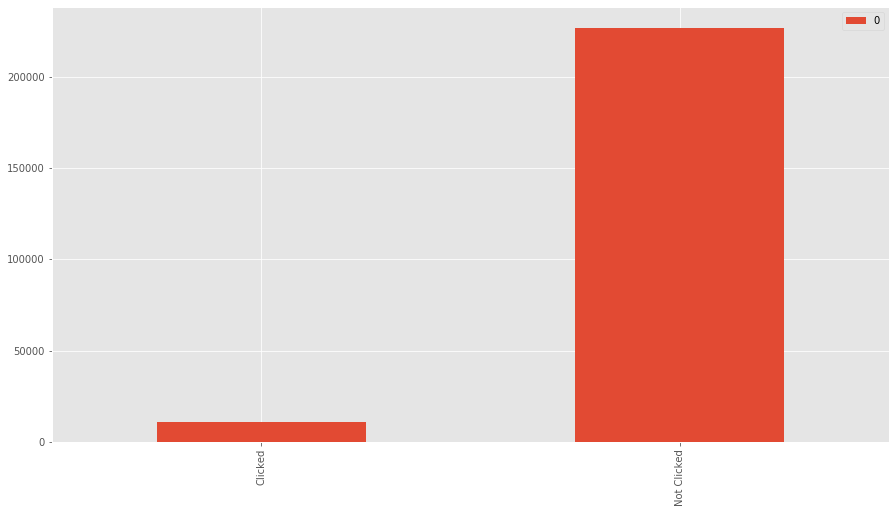

In [57]:
#Gender and survival possibility
clicked = train_data_modified[train_data_modified["is_click"]==1]["is_click"].count()
print(clicked)
notclicked = train_data_modified[train_data_modified["is_click"]==0]["is_click"].count()
print(notclicked)
df = pd.DataFrame([clicked,notclicked])
df.index = ['Clicked','Not Clicked']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [58]:
clicked_df = train_data_modified[train_data_modified["is_click"]==1]

In [59]:
clicked_df.shape

(10862, 7)

In [60]:
clicked_df = clicked_df.set_index(['impression_time'])
clicked_df.head(2)

,impression_id,user_id,app_code,os_version,is_4G,is_click
impression_time,,,,,,
2018-11-15 00:01:00,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,latest,1,1
2018-11-15 00:06:00,43ec517d68b6edd3015b3edc9a11367b,74339,481,old,0,1


In [61]:
def f(x):
     return Series(dict(Number_of_clicks = x['is_click'].count(), 
))

In [62]:
daily_count = clicked_df.groupby(clicked_df.index.date).apply(f)
print(len(daily_count))
daily_count.index.name = 'date'
daily_count.head(29)

29


,Number_of_clicks
date,
2018-11-15,444
2018-11-16,285
2018-11-17,325
2018-11-18,354
2018-11-19,305
2018-11-20,416
2018-11-21,420
2018-11-22,340
2018-11-23,300


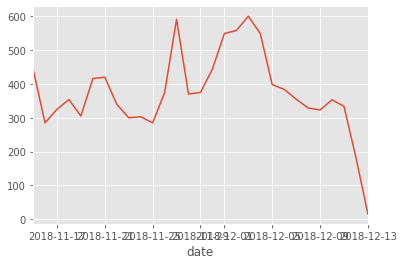

In [63]:
daily_plot = daily_count['Number_of_clicks'].plot(kind='line')

In [64]:
weekday_count = clicked_df.groupby(clicked_df.index.weekday).apply(f)
print(len(weekday_count))
weekday_count

7


,Number_of_clicks
impression_time,
0,1632
1,1890
2,1371
3,1559
4,1384
5,1506
6,1520


In [65]:
hourly_count = clicked_df.groupby(clicked_df.index.hour).apply(f)
print(len(hourly_count))
hourly_count

24


,Number_of_clicks
impression_time,
0,970
1,518
2,217
3,79
4,64
5,74
6,123
7,200
8,263


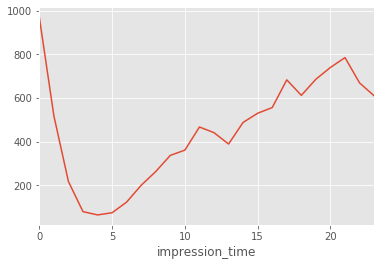

In [66]:
hourly_plot = hourly_count['Number_of_clicks'].plot()

In [67]:
minute_count = clicked_df.groupby(clicked_df.index.minute).apply(f)
print(len(minute_count))
minute_count.head()

60


,Number_of_clicks
impression_time,
0,200
1,190
2,191
3,191
4,213


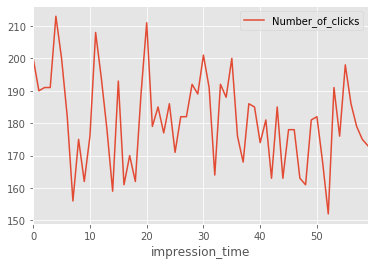

In [68]:
minute_count.plot()

In [69]:
def get_result(predicted):
    print("F1_Score: " + str(f1_score(y_validation, predicted, average='macro')))
    print ("accuracy: " + str(accuracy_score(y_validation, predicted)))
    print ("AUC: " + str(roc_auc_score(y_validation, predicted)))
    print ("recall: " + str(recall_score(y_validation, predicted)))
    return

In [70]:
# Decision tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [71]:
train_data_modified.dtypes

impression_id              object
impression_time    datetime64[ns]
user_id                     int64
app_code                    int64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [72]:
train_data_modified.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [73]:
def process_os_version():
    
    global train_data_modified
    # mapping string values to numerical one 
    train_data_modified['os_version'] = train_data_modified['os_version'].map({'old':0,'intermediate':1,'latest':2})

In [74]:
process_os_version()
train_data_modified.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,0,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,2,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,1,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,2,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,2,0,0


In [75]:
# dummy encoding 
app_code_dummies = pd.get_dummies(train_data_modified['app_code'],prefix='app_code')
train_data_modified = pd.concat([train_data_modified,app_code_dummies],axis=1)
train_data_modified.head()    

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,app_code_0,app_code_1,app_code_2,...,app_code_513,app_code_514,app_code_515,app_code_516,app_code_517,app_code_518,app_code_519,app_code_520,app_code_521,app_code_522
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
train_data_modified.drop('app_code',axis=1,inplace=True)

In [77]:
# dummy encoding 
os_version_dummies = pd.get_dummies(train_data_modified['os_version'],prefix='os_version')
train_data_modified = pd.concat([train_data_modified,os_version_dummies],axis=1)
train_data_modified.head()  

,impression_id,impression_time,user_id,os_version,is_4G,is_click,app_code_0,app_code_1,app_code_2,app_code_3,...,app_code_516,app_code_517,app_code_518,app_code_519,app_code_520,app_code_521,app_code_522,os_version_0,os_version_1,os_version_2
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
# dummy encoding 
is_4G_dummies = pd.get_dummies(train_data_modified['is_4G'],prefix='is_4G')
train_data_modified = pd.concat([train_data_modified,is_4G_dummies],axis=1)
train_data_modified.head()  

,impression_id,impression_time,user_id,os_version,is_4G,is_click,app_code_0,app_code_1,app_code_2,app_code_3,...,app_code_518,app_code_519,app_code_520,app_code_521,app_code_522,os_version_0,os_version_1,os_version_2,is_4G_0,is_4G_1
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [79]:
train_data_modified.drop('os_version',axis=1,inplace=True)

In [80]:
train_data_modified.drop('is_4G',axis=1,inplace=True)

In [81]:
train_data_modified.head()

,impression_id,impression_time,user_id,is_click,app_code_0,app_code_1,app_code_2,app_code_3,app_code_4,app_code_5,...,app_code_518,app_code_519,app_code_520,app_code_521,app_code_522,os_version_0,os_version_1,os_version_2,is_4G_0,is_4G_1
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [82]:
train_data_custom = pd.read_csv(r"C:/01 Projects/07 Personal_Projects/06 Hackathon/01_WNS_Analytics_Wizard/train_NA17Sgz/train.csv")
train_data_custom.shape

(237609, 7)

In [83]:
train_data_custom.dtypes

impression_id      object
impression_time    object
user_id             int64
app_code            int64
os_version         object
is_4G               int64
is_click            int64
dtype: object

In [84]:
clicked_df = train_data_custom[train_data_custom["is_click"]==1]

In [85]:
clicked_df.shape

(10862, 7)

In [86]:
clicked_df.groupby("app_code")

In [87]:
clicked_df

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
10,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,74339,481,old,0,1
54,42998cf32d552343bc8e460416382dca,2018-11-15 00:42:00,81926,249,latest,0,1
69,a9a1d5317a33ae8cef33961c34144f84,2018-11-15 00:57:00,8779,242,latest,1,1
73,5d44ee6f2c3f71b73125876103c8f6c4,2018-11-15 01:02:00,8636,469,intermediate,0,1
78,1595af6435015c77a7149e92a551338e,2018-11-15 01:11:00,13375,5,old,1,1
102,5705e1164a8394aace6018e27d20d237,2018-11-15 02:02:00,52485,244,intermediate,0,1
125,36a16a2505369e0c922b6ea7a23a56d2,2018-11-15 03:13:00,24824,244,latest,1,1
135,38ca89564b2259401518960f7a06f94b,2018-11-15 04:02:00,82558,151,old,1,1
140,7501e5d4da87ac39d782741cd794002d,2018-11-15 04:30:00,56586,242,latest,1,1


In [88]:
clicked_df_groupby = clicked_df.groupby("app_code").count()

In [89]:
clicked_df_groupby

,impression_id,impression_time,user_id,os_version,is_4G,is_click
app_code,,,,,,
0,6,6,6,6,6,6
1,3,3,3,3,3,3
2,9,9,9,9,9,9
3,305,305,305,305,305,305
5,396,396,396,396,396,396
7,45,45,45,45,45,45
8,5,5,5,5,5,5
9,46,46,46,46,46,46
14,17,17,17,17,17,17


<BarContainer object of 263 artists>

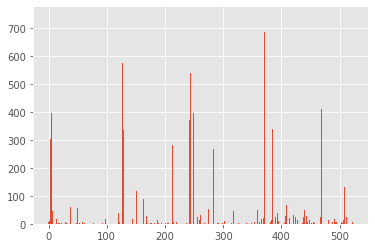

In [91]:
plt.bar(clicked_df_groupby.index, clicked_df_groupby.is_click)